Graph 1:


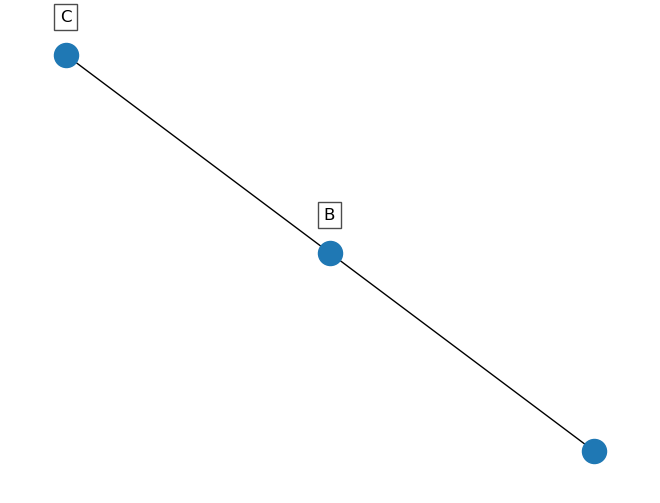

Graph 2:


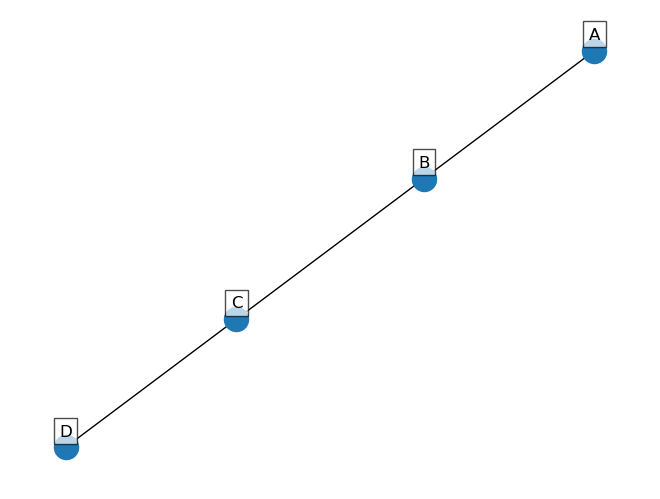

Graph Edit Distance: 3.0


In [2]:
import networkx as nx

import matplotlib.pyplot as plt

import json

 

def graph_edit_distance(G1, G2):

    # Create graph objects from JSON

    graph1 = nx.node_link_graph(G1)

    graph2 = nx.node_link_graph(G2)

   

    # Compute graph edit distance

    distance = nx.graph_edit_distance(graph1, graph2,

                                      node_match=lambda n1, n2: n1.get('id', '') == n2.get('id', '') and n1.get('attr', '') == n2.get('attr', ''))

   

    return distance

 

# Function to visualize a graph from JSON

def visualize_graph(graph_json):

    graph = nx.node_link_graph(graph_json)

    pos = nx.spring_layout(graph)  # Position nodes using Fruchterman-Reingold force-directed algorithm

    nx.draw(graph, pos, with_labels=False)

    # Draw node attributes above nodes with larger font size

    labels = {node['id']: node.get('attr', '') for node in graph_json['nodes']}

    node_label_y_offset = 0.05  # Offset for placing node labels slightly above the nodes

    for node, label in labels.items():

        x, y = pos[node]

        plt.text(x, y + node_label_y_offset, label, ha='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.7))

    plt.show()

 

# Example JSON representations of two graphs with node attributes

graph1_json = {

    "directed": False,

    "multigraph": False,

    "graph": {},

    "nodes": [

        {"id": 0, "attr2": "A"},

        {"id": 1, "attr": "B"},

        {"id": 2, "attr": "C"}

    ],

    "links": [

        {"source": 0, "target": 1},

        {"source": 1, "target": 2}

    ]

}

 

graph2_json = {

    "directed": False,

    "multigraph": False,

    "graph": {},

    "nodes": [

        {"id": 0, "attr": "A"},

        {"id": 1, "attr": "B"},

        {"id": 2, "attr": "C"},

       # {"id": 3, "attr": "D"}
       #notes: 1 object difference
       #

    ],

    "links": [

        {"source": 0, "target": 1},

        {"source": 1, "target": 2},

        {"source": 2, "target": 3}

    ]

}

 

# Visualize the graphs

print("Graph 1:")

visualize_graph(graph1_json)

 

print("Graph 2:")

visualize_graph(graph2_json)

 

# Compute and print graph edit distance

distance = graph_edit_distance(graph1_json, graph2_json)

print("Graph Edit Distance:", distance)